In [211]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [212]:
df=pd.DataFrame()

In [213]:
df["x1"]=[3,6,7,2,8,5,3,9,1,4]
df["x2"]=[5,7,8,2,3,2,9,7,1,5]
df['label']=[1,1,0,1,1,0,0,1,1,0]
df

,x1,x2,label
0,3,5,1
1,6,7,1
2,7,8,0
3,2,2,1
4,8,3,1
5,5,2,0
6,3,9,0
7,9,7,1
8,1,1,1
9,4,5,0


<Axes: xlabel='x1', ylabel='x2'>

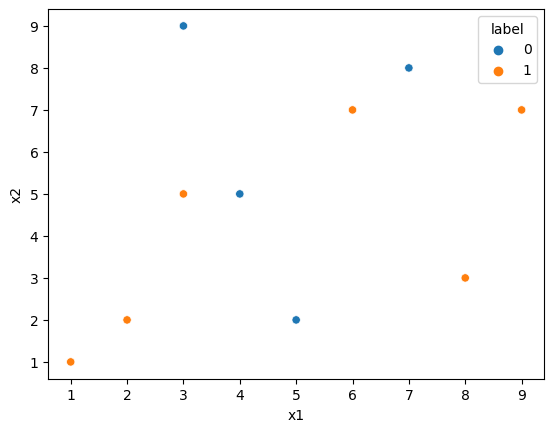

In [214]:
sns.scatterplot(df,x=df["x1"],y=df["x2"],hue=df['label'])

In [215]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]
y

0    1
1    1
2    0
3    1
4    1
5    0
6    0
7    1
8    1
9    0
Name: label, dtype: int64

In [216]:
X

,x1,x2
0,3,5
1,6,7
2,7,8
3,2,2
4,8,3
5,5,2
6,3,9
7,9,7
8,1,1
9,4,5


In [217]:
df['weight']=1/df.shape[0]
df
# first time all weight initialize same

,x1,x2,label,weight
0,3,5,1,0.1
1,6,7,1,0.1
2,7,8,0,0.1
3,2,2,1,0.1
4,8,3,1,0.1
5,5,2,0,0.1
6,3,9,0,0.1
7,9,7,1,0.1
8,1,1,1,0.1
9,4,5,0,0.1


In [218]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier( max_depth=1)
dtc.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

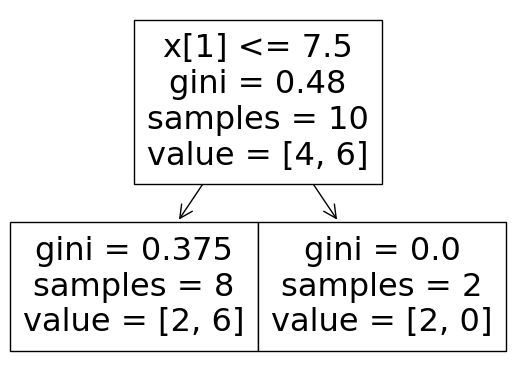

In [219]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [220]:
y_pre=dtc.predict(X)
y_pre

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [221]:
df['y_pre']=y_pre
df

,x1,x2,label,weight,y_pre
0,3,5,1,0.1,1
1,6,7,1,0.1,1
2,7,8,0,0.1,0
3,2,2,1,0.1,1
4,8,3,1,0.1,1
5,5,2,0,0.1,1
6,3,9,0,0.1,0
7,9,7,1,0.1,1
8,1,1,1,0.1,1
9,4,5,0,0.1,1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

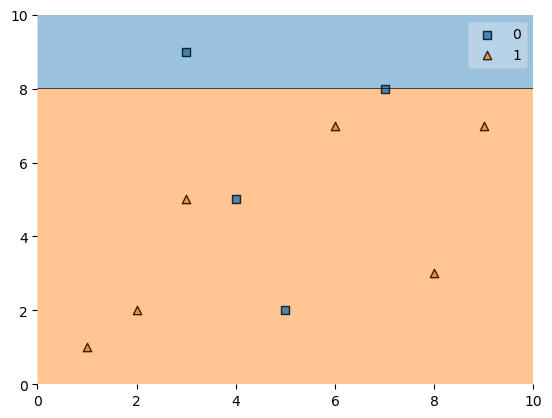

In [222]:
plot_decision_regions(X.values,y.values,clf=dtc)

In [223]:
#model_weight

In [226]:
def calculatated_weight(error):
    
    return 0.5*np.log((1-error)/error)


In [227]:
alpha=calculatated_weight(0.2)
float(alpha)

0.6931471805599453

In [228]:
#weight update

In [229]:
def weight_row_update(row,alpha=0.693):
    if row['label']==row['y_pre']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [230]:
df['weight_update']=df.apply(weight_row_update,axis=1)
df

,x1,x2,label,weight,y_pre,weight_update
0,3,5,1,0.1,1,0.050007
1,6,7,1,0.1,1,0.050007
2,7,8,0,0.1,0,0.050007
3,2,2,1,0.1,1,0.050007
4,8,3,1,0.1,1,0.050007
5,5,2,0,0.1,1,0.199971
6,3,9,0,0.1,0,0.050007
7,9,7,1,0.1,1,0.050007
8,1,1,1,0.1,1,0.050007
9,4,5,0,0.1,1,0.199971


In [231]:
df['normalized_weight']=df['weight_update']/df['weight_update'].sum()

In [232]:
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight
0,3,5,1,0.1,1,0.050007,0.062509
1,6,7,1,0.1,1,0.050007,0.062509
2,7,8,0,0.1,0,0.050007,0.062509
3,2,2,1,0.1,1,0.050007,0.062509
4,8,3,1,0.1,1,0.050007,0.062509
5,5,2,0,0.1,1,0.199971,0.249963
6,3,9,0,0.1,0,0.050007,0.062509
7,9,7,1,0.1,1,0.050007,0.062509
8,1,1,1,0.1,1,0.050007,0.062509
9,4,5,0,0.1,1,0.199971,0.249963


In [233]:
df['normalized_weight'].sum()

0.9999999999999999

In [234]:
#cumulative sum

In [235]:
df['uper_cumulative_sum']=df['normalized_weight'].cumsum()

In [236]:
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509
1,6,7,1,0.1,1,0.050007,0.062509,0.125018
2,7,8,0,0.1,0,0.050007,0.062509,0.187528
3,2,2,1,0.1,1,0.050007,0.062509,0.250037
4,8,3,1,0.1,1,0.050007,0.062509,0.312546
5,5,2,0,0.1,1,0.199971,0.249963,0.562509
6,3,9,0,0.1,0,0.050007,0.062509,0.625018
7,9,7,1,0.1,1,0.050007,0.062509,0.687528
8,1,1,1,0.1,1,0.050007,0.062509,0.750037
9,4,5,0,0.1,1,0.199971,0.249963,1.000000


In [237]:
df['lower_cumu_sum']=df['uper_cumulative_sum']-df['normalized_weight']

In [238]:
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


# upscaling datais- where misclassified point weight increase 

In [239]:
def new_datasets(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            
            
            if row['uper_cumulative_sum']>a and a>row['lower_cumu_sum']:
                indices.append(index)
                
    return indices             
            

In [240]:
index_va=new_datasets(df)
index_va

[9, 2, 0, 9, 9, 0, 9, 5, 4, 5]

In [241]:
#df.iloc[row,column]

In [242]:
second_dataset = df.iloc[index_va, [0, 1, 2, 3]]
second_dataset


,x1,x2,label,weight
9,4,5,0,0.1
2,7,8,0,0.1
0,3,5,1,0.1
9,4,5,0,0.1
9,4,5,0,0.1
0,3,5,1,0.1
9,4,5,0,0.1
5,5,2,0,0.1
4,8,3,1,0.1
5,5,2,0,0.1


In [243]:
#secound decision tree

In [244]:
dtc2=DecisionTreeClassifier( max_depth=1)
dtc2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

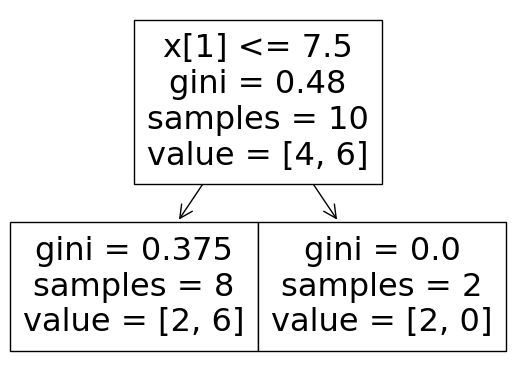

In [245]:
plot_tree(dtc2)

In [246]:
y_pre=dtc2.predict(X)
y_pre

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [247]:
df['y_pre']=y_pre
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

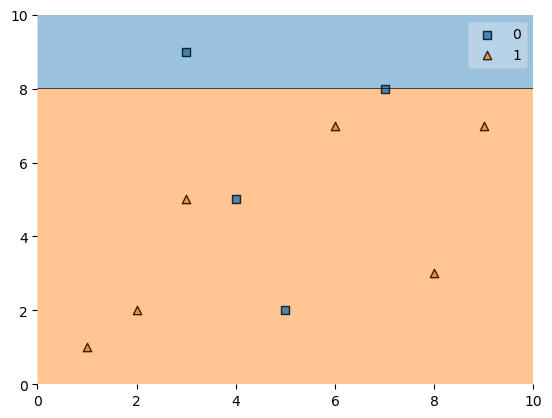

In [248]:
plot_decision_regions(X.values,y.values,clf=dtc3)

In [249]:
def calculatated_weight(error):
    
    return 0.5*np.log((1-error)/error)

In [250]:
alpha=calculatated_weight(0.2)
float(alpha)

0.6931471805599453

In [251]:
def weight_row_update(row,alpha=0.693):
    if row['label']==row['y_pre']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [252]:
df['weight_update']=df.apply(weight_row_update,axis=1)
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [253]:
df['normalized_weight']=df['weight_update']/df['weight_update'].sum()
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [254]:
df['normalized_weight'].sum()

0.9999999999999999

In [255]:
df['uper_cumulative_sum']=df['normalized_weight'].cumsum()
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [256]:
df['lower_cumu_sum']=df['uper_cumulative_sum']-df['normalized_weight']
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [257]:
def new_datasets(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            
            
            if row['uper_cumulative_sum']>a and a>row['lower_cumu_sum']:
                indices.append(index)
                
    return indices 

In [258]:
indices_val=new_datasets(df)
indices_val

[6, 9, 9, 9, 9, 8, 5, 3, 9, 6]

In [259]:
third_dataset = df.iloc[index_va, [0, 1, 2, 3]]
third_dataset

,x1,x2,label,weight
9,4,5,0,0.1
2,7,8,0,0.1
0,3,5,1,0.1
9,4,5,0,0.1
9,4,5,0,0.1
0,3,5,1,0.1
9,4,5,0,0.1
5,5,2,0,0.1
4,8,3,1,0.1
5,5,2,0,0.1


In [260]:
dtc3=DecisionTreeClassifier( max_depth=1)
dtc3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

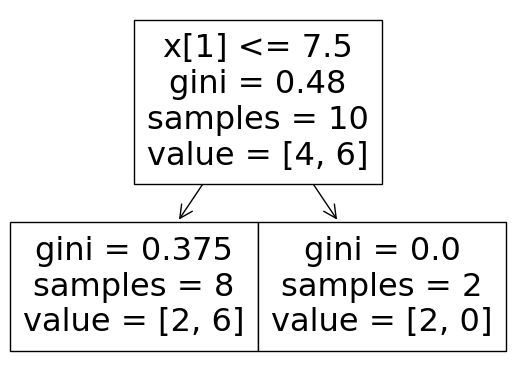

In [261]:
plot_tree(dtc3)

In [262]:
y_pre=dtc3.predict(X)
y_pre

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [263]:
df['y_pre']=y_pre
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

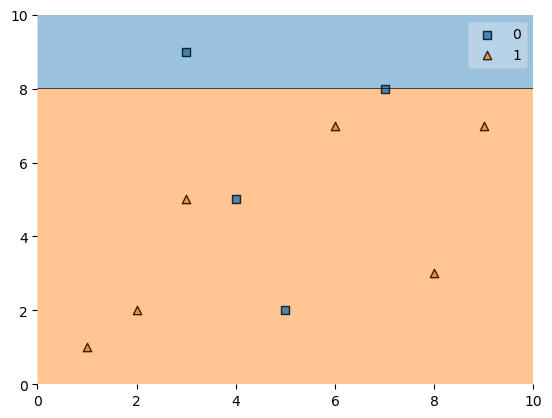

In [264]:
plot_decision_regions(X.values,y.values,clf=dtc3)

In [265]:
def calculatated_weight(error):
    
    return 0.5*np.log((1-error)/error)

In [266]:
alpha=calculatated_weight(0.2)
float(alpha)

0.6931471805599453

In [267]:
def weight_row_update(row,alpha=0.693):
    if row['label']==row['y_pre']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [268]:
df['weight_update']=df.apply(weight_row_update,axis=1)
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [269]:
df['normalized_weight']=df['weight_update']/df['weight_update'].sum()
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [270]:
df['normalized_weight'].sum()

0.9999999999999999

In [271]:
df['uper_cumulative_sum']=df['normalized_weight'].cumsum()
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [272]:
df['lower_cumu_sum']=df['uper_cumulative_sum']-df['normalized_weight']
df

,x1,x2,label,weight,y_pre,weight_update,normalized_weight,uper_cumulative_sum,lower_cumu_sum
0,3,5,1,0.1,1,0.050007,0.062509,0.062509,0.000000
1,6,7,1,0.1,1,0.050007,0.062509,0.125018,0.062509
2,7,8,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,2,2,1,0.1,1,0.050007,0.062509,0.250037,0.187528
4,8,3,1,0.1,1,0.050007,0.062509,0.312546,0.250037
5,5,2,0,0.1,1,0.199971,0.249963,0.562509,0.312546
6,3,9,0,0.1,0,0.050007,0.062509,0.625018,0.562509
7,9,7,1,0.1,1,0.050007,0.062509,0.687528,0.625018
8,1,1,1,0.1,1,0.050007,0.062509,0.750037,0.687528
9,4,5,0,0.1,1,0.199971,0.249963,1.000000,0.750037


In [285]:
prediction_quer=np.array([7,8]).reshape(1,2)
dtc.predict(prediction_quer)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [286]:
dtc2.predict(prediction_quer)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [287]:
dtc3.predict(prediction_quer)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [290]:
alpha*0+alpha*0+alpha*0

0.0

In [292]:
np.sign(0.0)

0.0